Missing Values:
 show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

Cleaned Data Sample:
     show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
4  80125979  Movie                             #realityhigh   
6  70304989  Movie                                 Automata   
7  80164077  Movie       Fabrizio Copano: Solo pienso en mi   
9  70304990  Movie                              Good People   

                          director  \
0         Richard Finn, Tim Maltby   
4                 Fernando Lebrija   
6                      Gabe Ibáñez   
7  Rodrigo Toro, Francisco Schultz   
9                Henrik Ruben Genz   

                                                cast  \
0  Alan Marriott, Andrew Toth, 

C:\Users\LOVE UMB\AppData\Local\Temp\ipykernel_26456\1040124512.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_cleaned_df['genres'] = netflix_cleaned_df['listed_in'].str.split(',')
C:\Users\LOVE UMB\AppData\Local\Temp\ipykernel_26456\1040124512.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


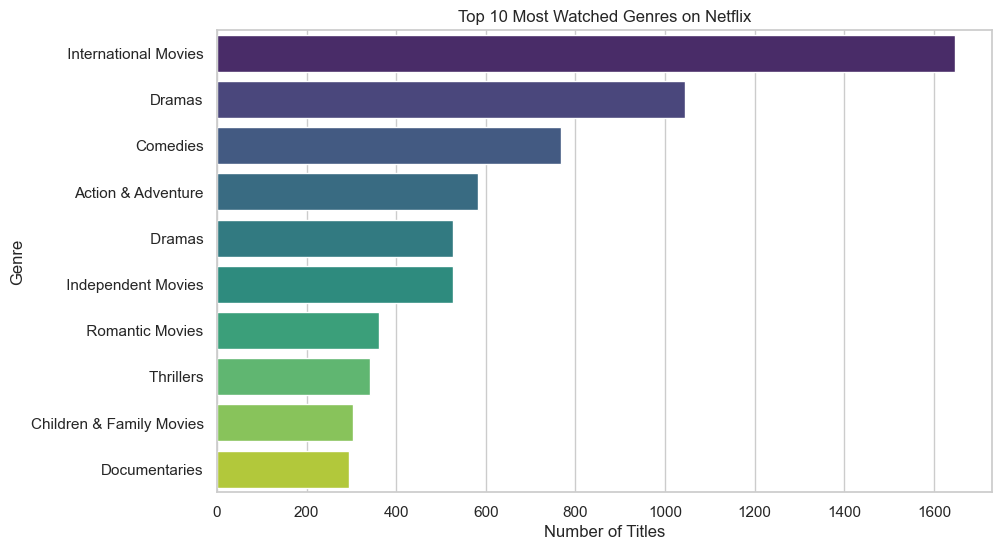

C:\Users\LOVE UMB\AppData\Local\Temp\ipykernel_26456\1040124512.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_cleaned_df, x='rating', palette='muted')


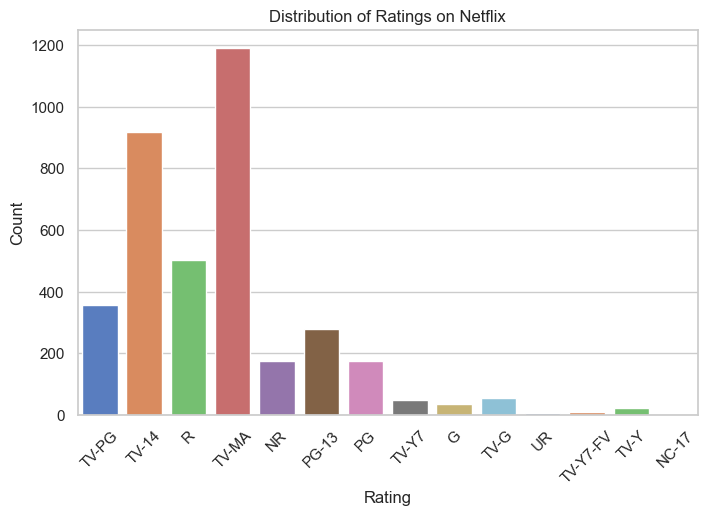

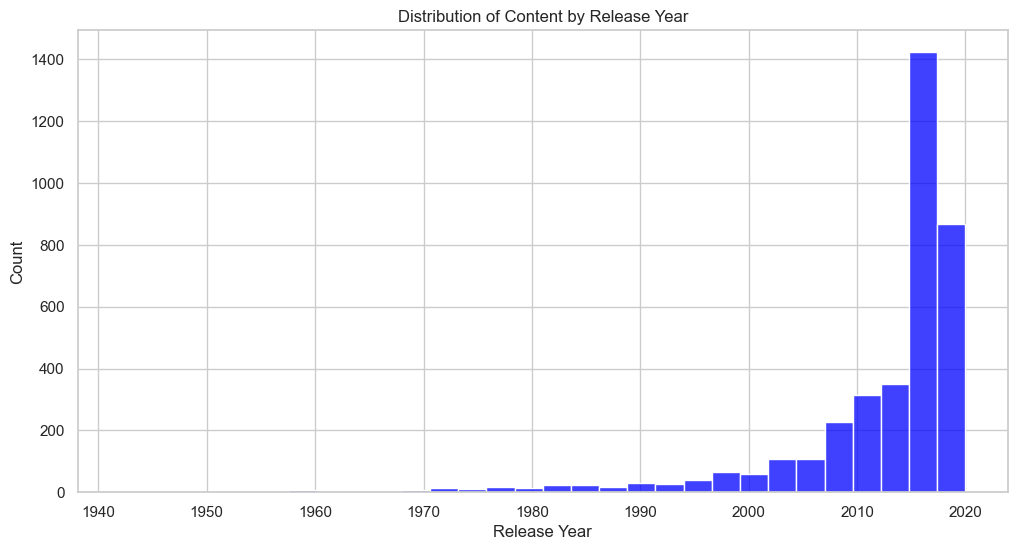

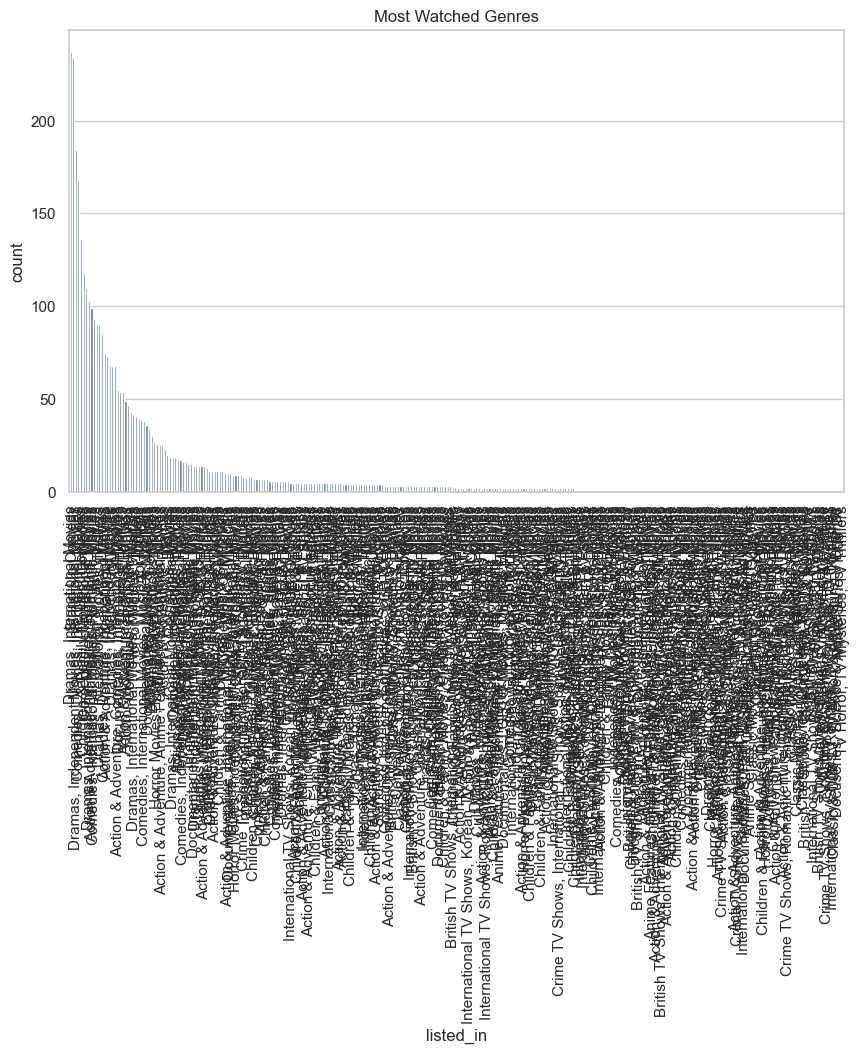

In [5]:
# Step 1: Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn theme for better visualization
sns.set(style="whitegrid")

# Step 2: Load the Dataset
# Use your actual file path
file_path = r"C:\Users\LOVE UMB\Desktop\NexFord Uni\BAN6420\Mod 4\netflix_data.csv"
netflix_df = pd.read_csv(file_path)

# Rename the dataset (for easier reference)
netflix_df.name = "Netflix_shows_movies"

# Step 3: Data Cleaning - Handling Missing Values
# Checking for missing values
print("Missing Values:\n", netflix_df.isnull().sum())

# Drop rows with missing values
netflix_cleaned_df = netflix_df.dropna()

# Optionally, fill missing values instead (Uncomment if preferred):
# netflix_cleaned_df = netflix_df.fillna("Unknown")

# Preview the cleaned data
print("\nCleaned Data Sample:\n", netflix_cleaned_df.head())

# Step 4: Data Exploration
# Describe the dataset to get an overview
print("\nData Description:\n", netflix_cleaned_df.describe(include='all'))

# Example: Frequency of different content types (Movies vs TV Shows)
content_type_counts = netflix_cleaned_df['type'].value_counts()
print("\nContent Type Distribution:\n", content_type_counts)

# Step 5: Data Visualization

## Visualization 1: Most Watched Genres
# Split the 'listed_in' column by commas to handle multiple genres per entry
netflix_cleaned_df['genres'] = netflix_cleaned_df['listed_in'].str.split(',')

# Flatten the genre lists into a single series for counting
all_genres = netflix_cleaned_df['genres'].explode()

# Count the occurrences of each genre and select top 10
genre_counts = all_genres.value_counts().head(10)

# Plot the top 10 most frequent genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Most Watched Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

## Visualization 2: Distribution of Ratings
# Plot the distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=netflix_cleaned_df, x='rating', palette='muted')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualization 3: Distribution of Content by Year
# Plot content distribution by release year
plt.figure(figsize=(12, 6))
sns.histplot(netflix_cleaned_df['release_year'], bins=30, kde=False, color='blue')
plt.title('Distribution of Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# Step 6: Saving Cleaned Data for Further Analysis
# Optionally, save the cleaned dataset
netflix_cleaned_df.to_csv(r"C:\Users\LOVE UMB\Desktop\NexFord Uni\BAN6420\Mod 4\cleaned_netflix_data.csv", index=False)

# Save the most watched genres plot as an image
plt.figure(figsize=(10, 6))
sns.countplot(data=netflix_cleaned_df, x='listed_in', order=netflix_cleaned_df['listed_in'].value_counts().index)
plt.title('Most Watched Genres')
plt.xticks(rotation=90)

# Save the figure
plt.savefig('most_watched_genres.png')  # Save the image with the correct filename
plt.show()  # Display the plot


